In [39]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

TensorFlow is already loaded. Please restart the runtime to change versions.


In [40]:
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


tokenizing data

In [0]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

getting the vocabulary of data


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)

In [43]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [0]:
model = Sequential()




In [28]:
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 5s 67us/step - loss: 0.8800 - acc: 0.5059 - val_loss: 0.8406 - val_acc: 0.5141
Epoch 2/5
75000/75000 [==============================] - 5s 66us/step - loss: 0.7893 - acc: 0.5784 - val_loss: 0.8408 - val_acc: 0.5160
Epoch 3/5
75000/75000 [==============================] - 5s 65us/step - loss: 0.6871 - acc: 0.6773 - val_loss: 0.8674 - val_acc: 0.5151
Epoch 4/5
75000/75000 [==============================] - 5s 66us/step - loss: 0.5013 - acc: 0.8118 - val_loss: 0.9588 - val_acc: 0.5159
Epoch 5/5
75000/75000 [==============================] - 5s 66us/step - loss: 0.2974 - acc: 0.9201 - val_loss: 1.0763 - val_acc: 0.5105


In [36]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)


176408
2470


In [8]:
# from keras.layers import Embedding
# X_train.shape


(75000, 2470)

In [0]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [38]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 262s 3ms/step - loss: 1.0226 - acc: 0.4940 - val_loss: 0.8616 - val_acc: 0.5039
Epoch 2/5
75000/75000 [==============================] - 262s 3ms/step - loss: 0.8353 - acc: 0.5124 - val_loss: 0.8329 - val_acc: 0.4994
Epoch 3/5
75000/75000 [==============================] - 267s 4ms/step - loss: 0.7999 - acc: 0.5472 - val_loss: 0.8348 - val_acc: 0.5002
Epoch 4/5
75000/75000 [==============================] - 263s 4ms/step - loss: 0.7438 - acc: 0.6062 - val_loss: 0.8596 - val_acc: 0.4920
Epoch 5/5
75000/75000 [==============================] - 265s 4ms/step - loss: 0.6392 - acc: 0.6930 - val_loss: 0.9359 - val_acc: 0.4871


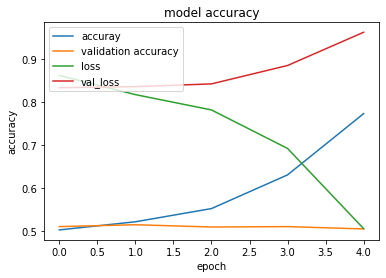

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [44]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)


In [0]:
sentences= twenty_train.data
y=twenty_train.target

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)


In [0]:
from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [48]:
h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 141s 17ms/step - loss: 12.3840 - acc: 0.0497 - val_loss: 3.1551 - val_acc: 0.0505
Epoch 2/5
8485/8485 [==============================] - 137s 16ms/step - loss: 2.9984 - acc: 0.0773 - val_loss: 2.9661 - val_acc: 0.0838
Epoch 3/5
8485/8485 [==============================] - 139s 16ms/step - loss: 2.8749 - acc: 0.1029 - val_loss: 2.8632 - val_acc: 0.1004
Epoch 4/5
8485/8485 [==============================] - 137s 16ms/step - loss: 2.7375 - acc: 0.1483 - val_loss: 2.7739 - val_acc: 0.1152
Epoch 5/5
8485/8485 [==============================] - 138s 16ms/step - loss: 2.5217 - acc: 0.2278 - val_loss: 2.5731 - val_acc: 0.1626


In [0]:
x=model.predict_classes(X_test[[1],:])

In [30]:
print("Actual Prediction",y_test[1],"Predicted Prediction",x)

Actual Prediction 2 Predicted Prediction [2]


In [35]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/logs/{}".format(time()))
model.fit(X_train,y_train,verbose=1,callbacks=[tensorboard], epochs=5)

Epoch 1/5
75000/75000 [==============================] - 23s 312us/step - loss: 0.2929 - acc: 0.8794
Epoch 2/5
75000/75000 [==============================] - 23s 309us/step - loss: 0.1789 - acc: 0.9332
Epoch 3/5
75000/75000 [==============================] - 23s 308us/step - loss: 0.1257 - acc: 0.9567
Epoch 4/5
75000/75000 [==============================] - 24s 314us/step - loss: 0.1015 - acc: 0.9679
Epoch 5/5
75000/75000 [==============================] - 23s 308us/step - loss: 0.0820 - acc: 0.9736


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
